# Student Performance on Exams

### Context:

This data set includes scores from three exams of students from a sampled American Highschools. The data set also include a variety of personal, social, and economic factors that have interaction effects on the exam scores.

### Research Questions:

1. How effective is the test preparation course?
2. Which major factors contribute to test outcomes?
3. What would be the best way to improve student scores on each test?

In [73]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
sns.set_style('darkgrid')

df = pd.read_csv("StudentsPerformance.csv")

In [74]:
df['Total score']=df['math score']+df['reading score']+df['writing score'] #Sum the 3 Scores
df['math score']=pd.to_numeric(df['math score'],downcast='float')

In [75]:
df.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total score
0,female,group B,bachelor's degree,standard,none,72.0,72,74,218
1,female,group C,some college,standard,completed,69.0,90,88,247
2,female,group B,master's degree,standard,none,90.0,95,93,278
3,male,group A,associate's degree,free/reduced,none,47.0,57,44,148
4,male,group C,some college,standard,none,76.0,78,75,229
5,female,group B,associate's degree,standard,none,71.0,83,78,232
6,female,group B,some college,standard,completed,88.0,95,92,275
7,male,group B,some college,free/reduced,none,40.0,43,39,122
8,male,group D,high school,free/reduced,completed,64.0,64,67,195
9,female,group B,high school,free/reduced,none,38.0,60,50,148


*All exams are taken in the afternoon, so students either had a regular lunch (standard) or they had little to no lunch (free/reduced)

*Some college refers to an incomeplete college degree

### Test Scores Averages:

In [76]:
print("Average math score is    : {}".format(np.mean(df['math score'])))
print("Average reading score is : {}".format(np.mean(df['reading score'])))
print("Average writing score is : {}".format(np.mean(df['writing score'])))
print("Average total score is   : {}".format(np.mean(df['Total score'])/3))

Average math score is    : 66.08899688720703
Average reading score is : 69.169
Average writing score is : 68.054
Average total score is   : 67.77066666666667


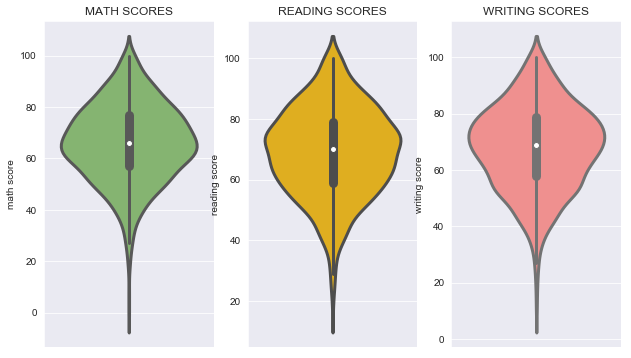

In [77]:
plt.figure(figsize=(14,6))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math score',data=df,palette='summer',linewidth=3)

plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading score',data=df,palette='Wistia_r',linewidth=3)

plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing score',data=df,palette='spring',linewidth=3)

Seems like students perform better in mathematics where majority of them score between 60-80 where in reading and wirting majority score between 50-80. All 3 areas seems to be normally distributed.

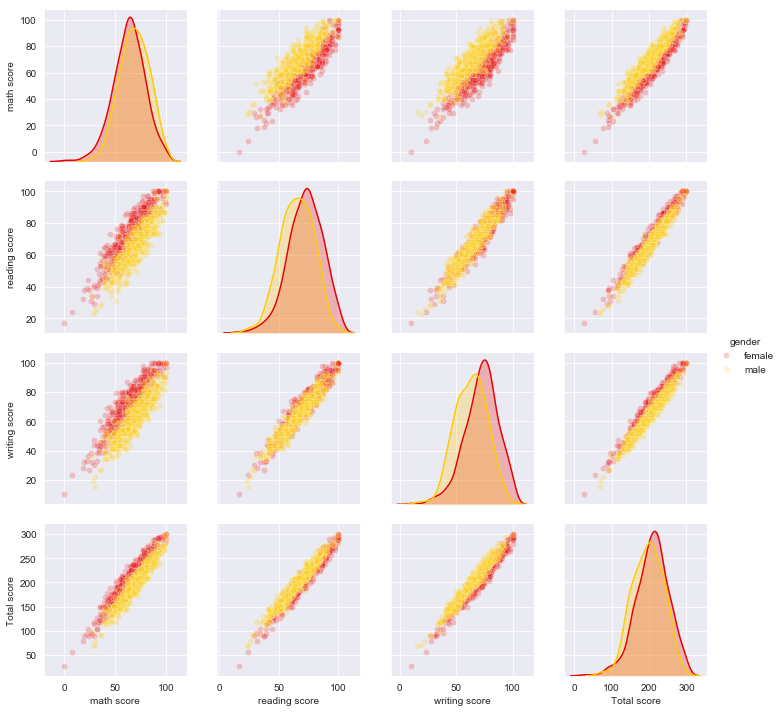

In [78]:
sns.pairplot(data=df,hue='gender',plot_kws={'alpha':0.2},palette='hot')

From the above plot it is clear that there is a linear relationship between the 3 exams. Thus student who performs well in  one subject tends to preform well in other subject. Therefore if find a significant correlation betweew facor and student's exam score, it should have the same effect on all 3 areas (math, reading and writing)

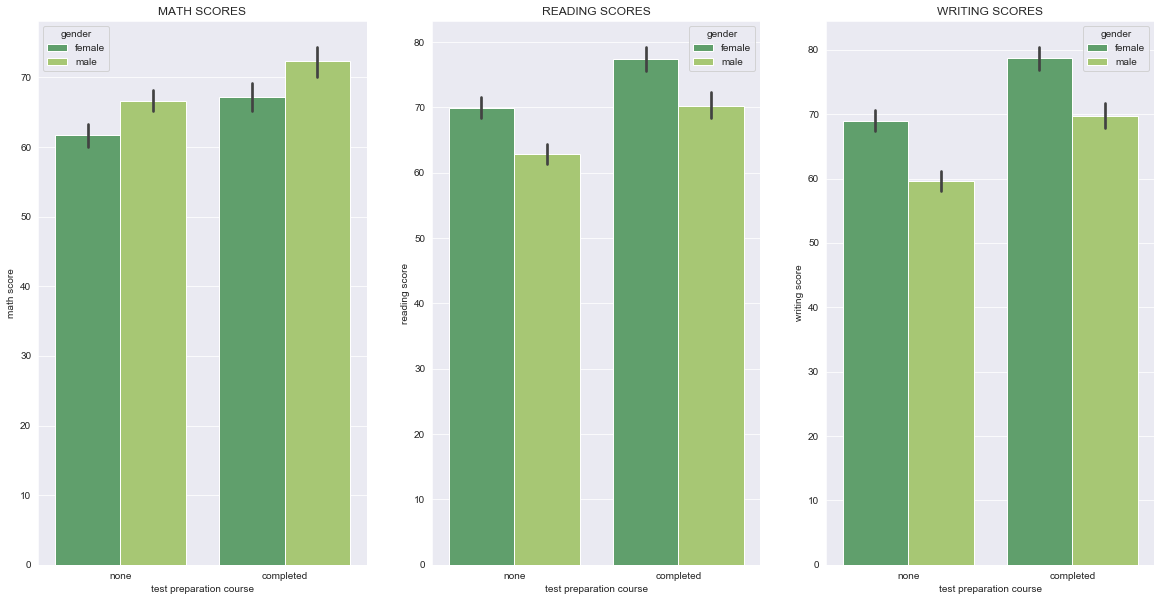

In [79]:
plt.figure(figsize=(20,10))
plt.subplot(1, 3, 1)
plt.title('MATH SCORES')
sns.barplot(x='test preparation course',y='math score', data=df , hue='gender',palette='summer')

plt.subplot(1, 3, 2)
plt.title('READING SCORES')
sns.barplot(x='test preparation course',y='reading score',data=df,hue='gender',palette='summer')

plt.subplot(1, 3, 3)
plt.title('WRITING SCORES')
sns.barplot(x='test preparation course',y='writing score',data=df,hue='gender',palette='summer')


Male students perform better in math whereas females perform better in reading and writing regardless if they have completed the test preperation course or not.

## 1.Race/Ethnicity

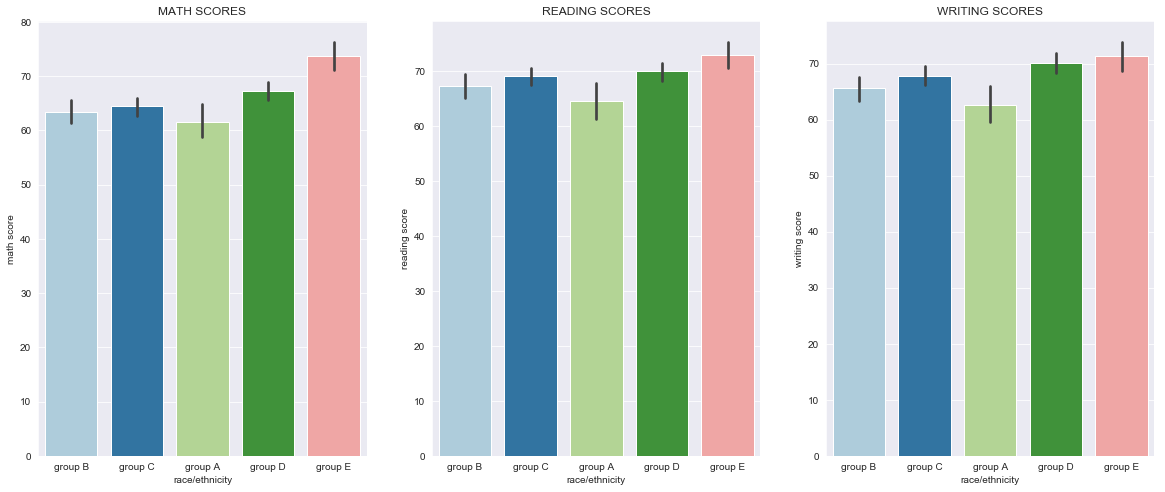

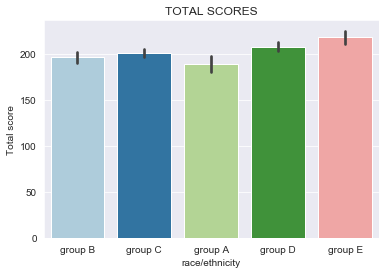

In [80]:
plt.figure(figsize=(20,8))
plt.subplot(1, 3, 1)
plt.title('MATH SCORES')
sns.barplot(x='race/ethnicity',y='math score',data=df,palette='Paired')

plt.subplot(1, 3, 2)
plt.title('READING SCORES')
sns.barplot(x='race/ethnicity',y='reading score',data=df,palette='Paired')

plt.subplot(1, 3, 3)
plt.title('WRITING SCORES')
sns.barplot(x='race/ethnicity',y='writing score',data=df,palette='Paired')
plt.show()

plt.title('TOTAL SCORES')
sns.barplot(x='race/ethnicity',y='Total score',data=df,palette='Paired')
plt.show()


In [81]:
race_average_grades = df.groupby('race/ethnicity')['Total score'].mean()
race_average_grades

race/ethnicity
group A    188.977528
group B    196.405263
group C    201.394984
group D    207.538168
group E    218.257143
Name: Total score, dtype: float64

#### Clearly we can see that group E outperforms all other groups all in all areas, follow by group D, C, B, and  A. 

####  E > D > C > B > A

## 2.Parental Level of Education 

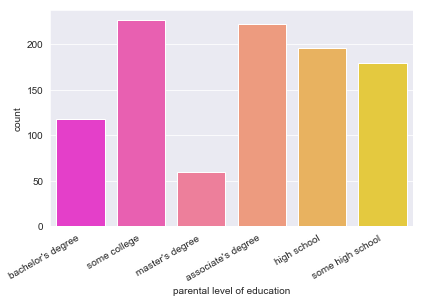

In [82]:
fig,ax=plt.subplots()
sns.countplot(x='parental level of education',data=df,palette='spring')
plt.tight_layout()
fig.autofmt_xdate()

It seems like majority of the parents pursued higher studies

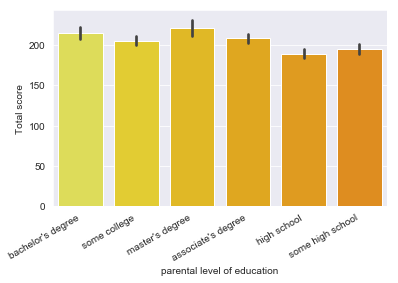

In [83]:
fig,ax=plt.subplots()
sns.barplot(x=df['parental level of education'],y='Total score',data=df,palette='Wistia')
fig.autofmt_xdate()


#### From the above plot, students tend to score better in all areas if parental level of education is beyong high school.

# 3.Food

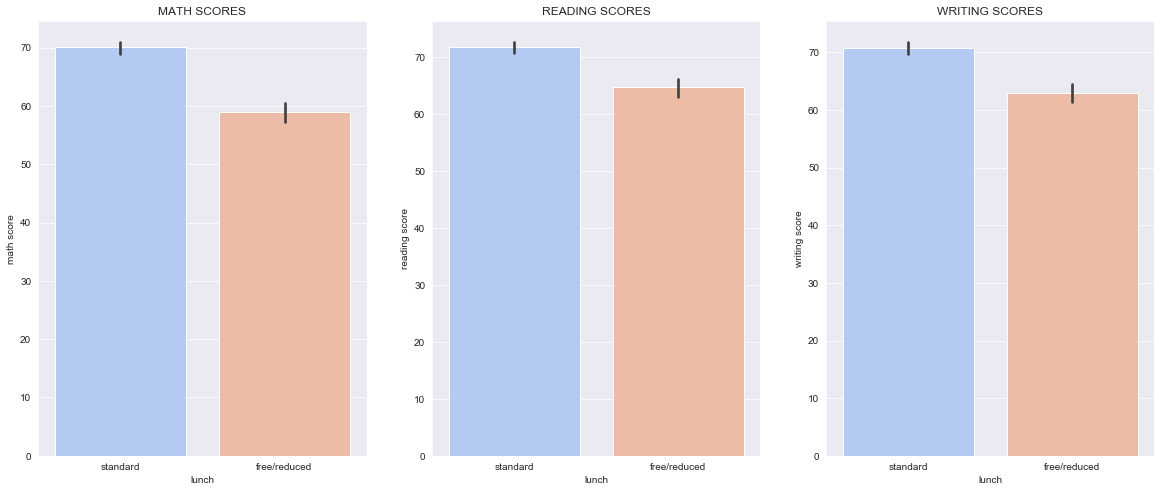

In [84]:
plt.figure(figsize=(20,8))
plt.subplot(1, 3, 1)
plt.title('MATH SCORES')
sns.barplot(x='lunch',y='math score',data=df,palette='coolwarm')


plt.subplot(1, 3, 2)
plt.title('READING SCORES')
sns.barplot(x='lunch',y='reading score',data=df,palette='coolwarm')


plt.subplot(1, 3, 3)
plt.title('WRITING SCORES')
sns.barplot(x='lunch',y='writing score',data=df,palette='coolwarm')

#### In all casees student score higher by having the standard lunch.

# 5.Test Preparation Course

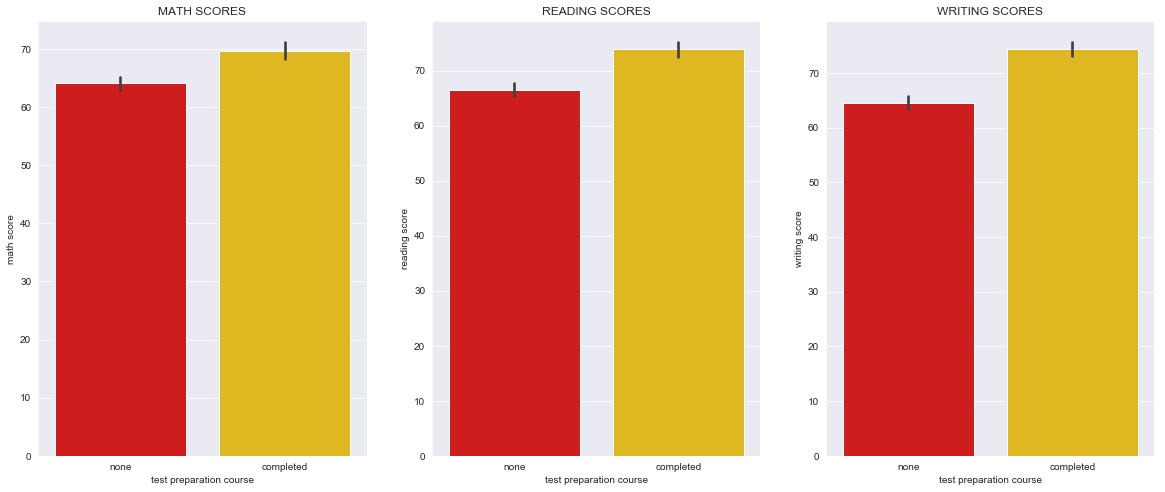

In [85]:
plt.figure(figsize=(20,8))
plt.subplot(1, 3, 1)
plt.title('MATH SCORES')
sns.barplot(x='test preparation course',y='math score',data=df,palette='hot')

plt.subplot(1, 3, 2)
plt.title('READING SCORES')
sns.barplot(x='test preparation course',y='reading score',data=df,palette='hot')

plt.subplot(1, 3, 3)
plt.title('WRITING SCORES')
sns.barplot(x='test preparation course',y='writing score',data=df,palette='hot')



#### Student who have completed the test preperation courses score higher in all 3 areas. This effect is most signifcant in writing.

### Research Questions:

1. How effective is the test preparation course?
2. Which major factors contribute to test outcomes?
3. What would be the best way to improve student scores on each test?

    1. Student who have completed the test preperation courses score higher on exams This effect is most signifcant and most promising on writing exam.

In [86]:
parental_education_average_grades = df.groupby('parental level of education')['Total score'].mean() 
food_average_grades = df.groupby('lunch')['Total score'].mean() 
test_prep_average_grades = df.groupby('test preparation course')['Total score'].mean() 

print("Standard deviation of average scores grouped by Race/Ethnicity               : {}".format(np.std(race_average_grades)))
print("Standard deviation of average scores grouped by Parental Level of Education  : {}".format(np.std(parental_education_average_grades)))
print("Standard deviation of average scores grouped by Food Choices                 : {}".format(np.std(food_average_grades)))
print("Standard deviation of average scores grouped by Test Preperation Course      : {}".format(np.std(test_prep_average_grades)))

Standard deviation of average scores grouped by Race/Ethnicity               : 9.948806383198226
Standard deviation of average scores grouped by Parental Level of Education  : 10.91762009529507
Standard deviation of average scores grouped by Food Choices                 : 12.957222404192592
Standard deviation of average scores grouped by Test Preperation Course      : 11.445778729180814


    2. Surprisingly, food choices has the greatest effect on students exam scores.

    3. Assuming that one's race and parental level of educaton are held unchanged. The best way to improve student scores on any given test would be to eat a standard lunch and complete the test preperation course.